## Step 1: Data Cleaning and Preprocessing:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("flipkart_com-ecommerce_sample.csv")
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [5]:
# Handling missing values
df.dropna(subset=['retail_price', 'discounted_price', 'description'], inplace=True)

In [6]:
df.shape

(19920, 15)

In [7]:
# Convert crawl_timestamp to datetime
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])

In [8]:
# Convert 'product_rating' and 'overall_rating' to numeric
df['product_rating'] = pd.to_numeric(df['product_rating'], errors='coerce')
df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce')

In [9]:
# Extract the primary category from 'product_category_tree'
df['category'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0][2:])

# Removing rows where 'discounted_price' is greater than 'retail_price'
df = df[df['discounted_price'] <= df['retail_price']]

In [10]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,NaN,NaN,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,NaN,NaN,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,NaN,NaN,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,NaN,NaN,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,NaN,NaN,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43+00:00,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,NaN,NaN,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,NaN,NaN,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,NaN,NaN,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19920 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  19920 non-null  object             
 1   crawl_timestamp          19920 non-null  datetime64[ns, UTC]
 2   product_url              19920 non-null  object             
 3   product_name             19920 non-null  object             
 4   product_category_tree    19920 non-null  object             
 5   pid                      19920 non-null  object             
 6   retail_price             19920 non-null  float64            
 7   discounted_price         19920 non-null  float64            
 8   image                    19917 non-null  object             
 9   is_FK_Advantage_product  19920 non-null  object             
 10  description              19920 non-null  object             
 11  product_rating           183

## Step 2: Exploratory Data Analysis (EDA)

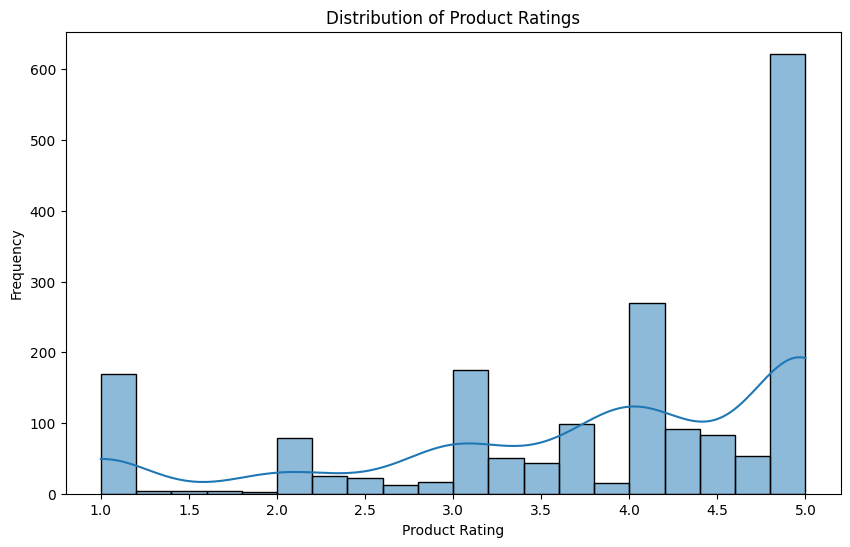

In [12]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['product_rating'], bins=20, kde=True)
plt.title("Distribution of Product Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Frequency")
plt.show()

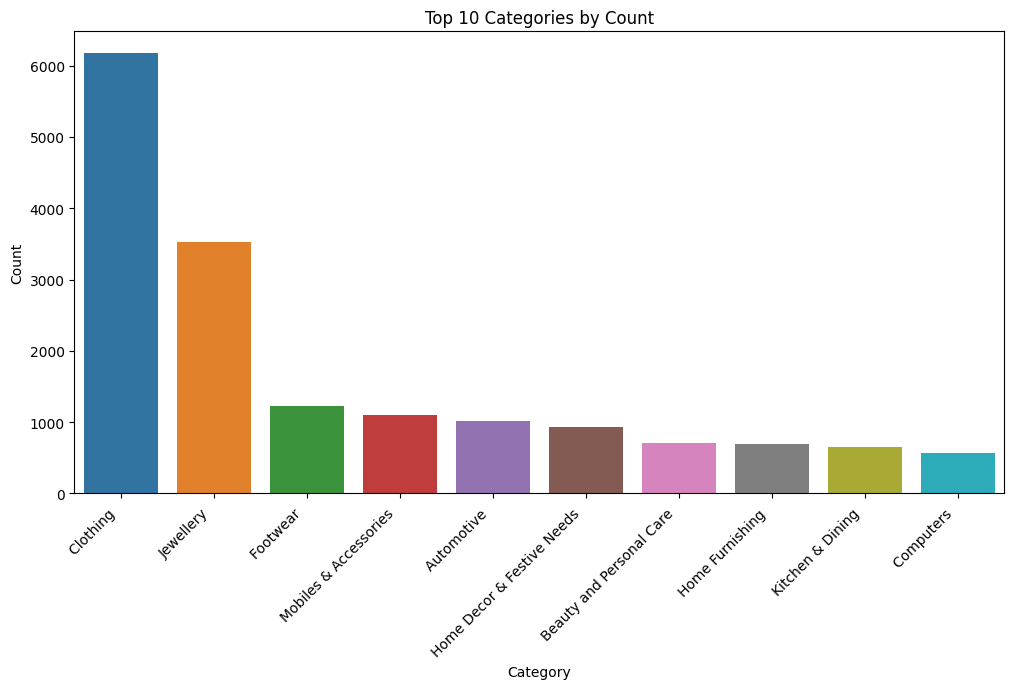

In [13]:
# Category-wise distribution
plt.figure(figsize=(12, 6))
category_counts = df['category'].value_counts().head(10)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Top 10 Categories by Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

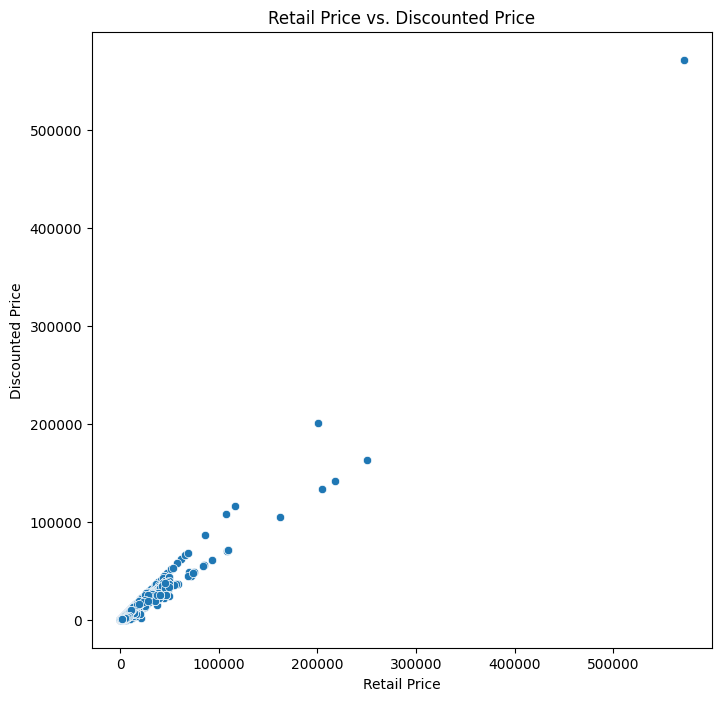

In [14]:
# Retail price vs. Discounted price scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x='retail_price', y='discounted_price', data=df)
plt.title("Retail Price vs. Discounted Price")
plt.xlabel("Retail Price")
plt.ylabel("Discounted Price")
plt.show()

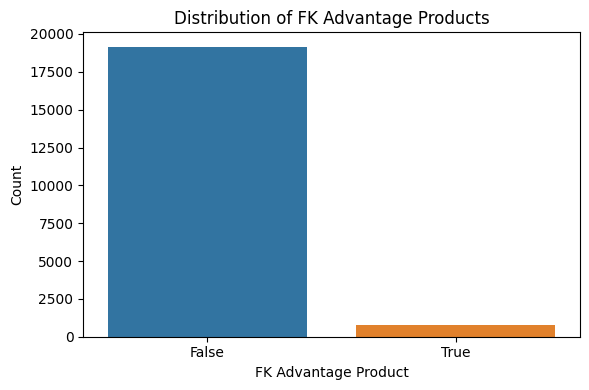

In [15]:
# Check the distribution of is_FK_Advantage_product
advantage_counts = df['is_FK_Advantage_product'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=advantage_counts.index, y=advantage_counts.values)
plt.xlabel('FK Advantage Product')
plt.ylabel('Count')
plt.title('Distribution of FK Advantage Products')
plt.tight_layout()
plt.show()

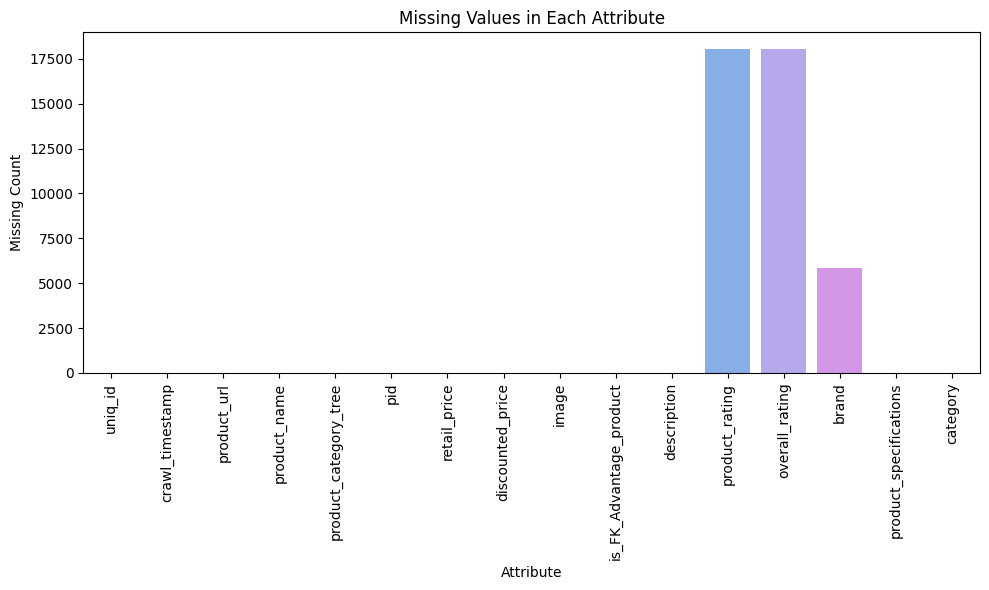

In [16]:
# Check for missing values in each attribute
missing_counts = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Attribute')
plt.ylabel('Missing Count')
plt.title('Missing Values in Each Attribute')
plt.tight_layout()
plt.show()

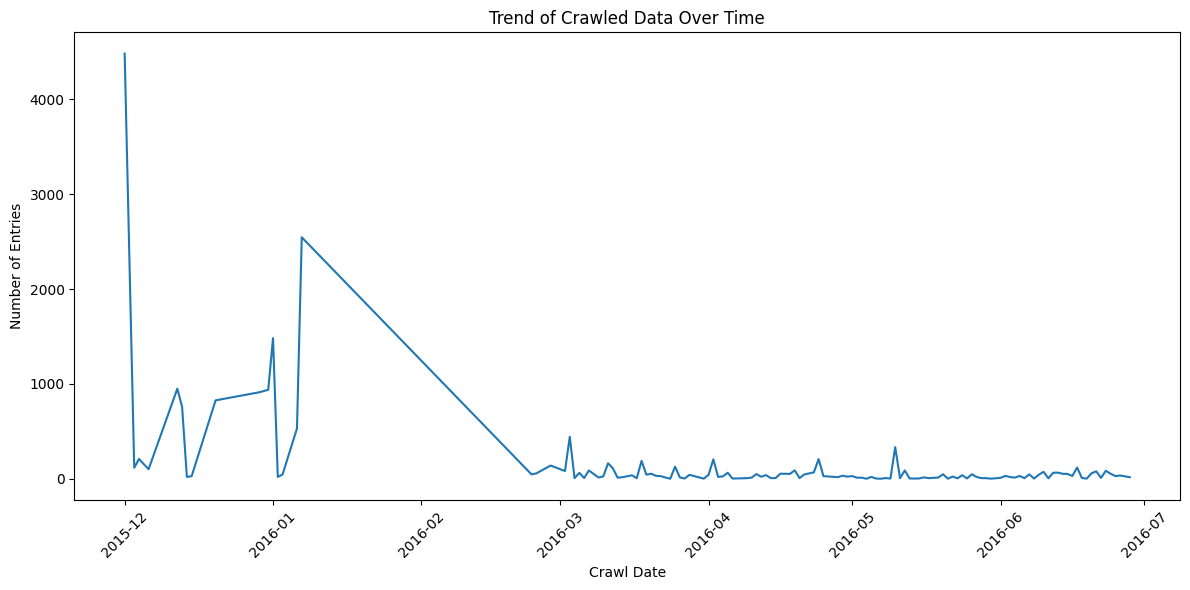

In [17]:
# Extract date and time information from crawl_timestamp
df['crawl_date'] = df['crawl_timestamp'].dt.date
df['crawl_time'] = df['crawl_timestamp'].dt.time

# Group data by crawl_date and count the number of entries for each date
date_counts = df['crawl_date'].value_counts().sort_index()

# Visualize the trend of crawled data over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values)
plt.xlabel('Crawl Date')
plt.ylabel('Number of Entries')
plt.title('Trend of Crawled Data Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
df.describe()

,retail_price,discounted_price,product_rating,overall_rating
count,19920.000000,19920.000000,1839.000000,1839.000000
mean,2979.415412,1973.552510,3.810332,3.810332
std,9010.066554,7333.938564,1.260124,1.260124
min,35.000000,35.000000,1.000000,1.000000
25%,666.000000,350.000000,3.000000,3.000000
50%,1040.000000,550.000000,4.000000,4.000000
75%,1999.000000,999.000000,5.000000,5.000000
max,571230.000000,571230.000000,5.000000,5.000000


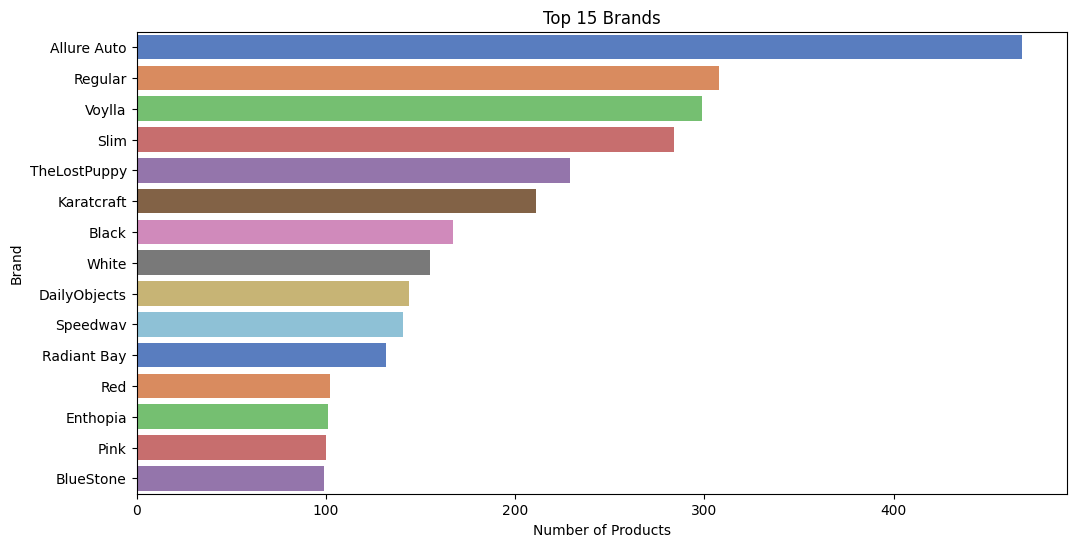

In [19]:
plt.figure(figsize=(12, 6))
top_brands = df['brand'].value_counts().head(15)
sns.barplot(x=top_brands, y=top_brands.index, palette='muted')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.title('Top 15 Brands')
plt.show()


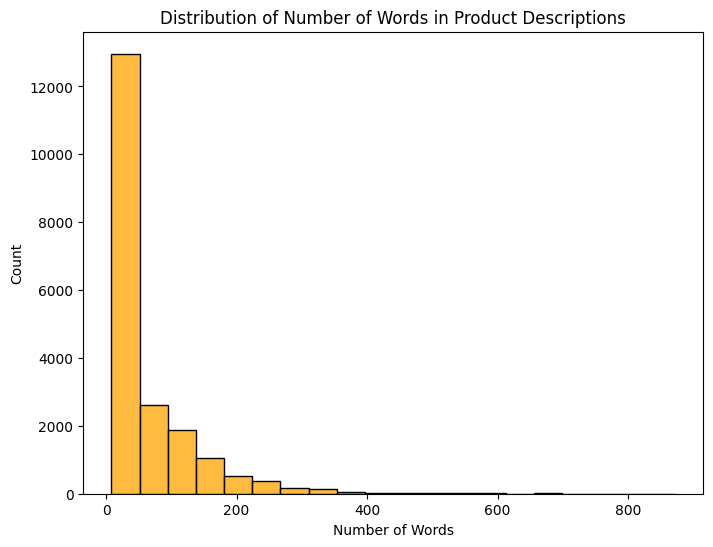

In [20]:
# Count the number of words in each product description
df['description_word_count'] = df['description'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Plot the distribution of the number of words in product descriptions
plt.figure(figsize=(8, 6))
sns.histplot(df['description_word_count'], bins=20, kde=False, color='orange')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Number of Words in Product Descriptions')
plt.show()


In [21]:
# df.to_csv('final_data_flipkart.csv', index=False)

Let's summarize the valuable insights gained from the analysis of the dataset attributes:

1. Distribution of ratings:
   - The distribution of product ratings shows that most products have ratings centered around a particular value, indicating that customers tend to give similar ratings to products.

2. Category-wise distribution:
   - The bar plot of the top 10 categories by count provides an overview of the most popular product categories in the dataset. It helps identify the categories with the highest number of products.

3. Retail price vs. Discounted price scatter plot:
   - The scatter plot of retail price against discounted price shows the relationship between the two variables. It allows us to understand how products are discounted and if there are any patterns in the pricing strategy.

4. Distribution of is_FK_Advantage_product:
   - We can visualize the distribution of the 'is_FK_Advantage_product' attribute to understand the prevalence of products that are offered under the Flipkart Advantage program.

5. Missing values:
   - Checking for missing values in each attribute helps us identify any data quality issues and understand which columns require imputation or further investigation.

6. Extract date and time information from crawl_timestamp:
   - Extracting date and time information from the 'crawl_timestamp' column enables us to analyze trends over time and potentially identify seasonality or temporal patterns.

7. Visualize the trend of crawled data over time:
   - By plotting the number of crawled products over time, we can observe how the dataset has evolved or been updated. This can help us identify periods with significant data updates.

8. Count the number of words in each product description:
   - Counting the number of words in product descriptions can provide insights into the length and complexity of product descriptions. It may help us understand the level of detail provided to customers.

9. Plot the distribution of the number of words in product descriptions:
   - The distribution plot of the number of words in product descriptions gives a better understanding of the typical length of descriptions and any potential outliers.


These insights can be valuable for various stakeholders, such as e-commerce platform administrators, sellers, and customers. Understanding popular product categories, pricing patterns, and product ratings can help with business decisions, marketing strategies, and customer satisfaction. Additionally, insights into product descriptions and images can enhance the overall user experience on the platform.

